<a href="https://colab.research.google.com/github/jagangirisaballa/iNeuron-Assignments/blob/master/Jagan_ML_Project_Clustering_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Problem Statement

Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_stock = pd.read_csv('/content/drive/My Drive/Colab Files/datasets/data_stocks.csv')

In [5]:
data_stock.shape

(41266, 502)

In [6]:
data_stock.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [7]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [8]:
data_stock.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,12.624442,167.030297,968.747188,57.683091,238.598238,33.413552,272.957640,32.652696,89.325485,126.928020,64.227338,69.502897,348.719389,73.025271,39.607469,121.375413,165.457076,32.139336,51.284218,127.416660,65.928564,81.014205,26.051030,25.216388,62.413344,75.477313,107.713287,34.794506,432.201844,...,18.236453,19.777207,73.184257,38.363101,116.967866,181.850786,47.086121,107.603907,109.019095,113.124563,51.863284,119.265065,95.693963,98.311314,57.134291,65.903890,123.767195,89.828376,66.790525,46.574448,176.242257,62.352736,53.587272,181.971118,73.777928,30.102558,77.066819,55.411353,19.272765,33.248472,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,1.172758,6.910730,38.966684,4.567420,12.824877,3.975551,13.763994,1.178095,5.746178,6.840787,2.634135,3.436516,25.257095,3.230921,1.225993,3.833343,10.024798,0.985571,2.377096,4.927756,4.133884,3.225397,1.976801,2.176216,2.624382,4.669540,9.865916,1.099296,17.370211,...,1.380061,1.437846,5.561782,1.159465,5.836284,9.608218,1.656671,2.717122,3.275806,5.662877,0.760720,3.242153,4.385522,5.335147,3.563356,1.859369,5.155408,9.226681,2.005502,1.767864,8.983449,1.540708,1.289050,9.512629,1.464602,0.927709,2.524082,2.424774,0.362162,0.908009,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,9.871000,152.300000,884.670000,48.410000,208.560000,28.020000,244.280000,30.460000,80.000000,113.771600,58.210000,63.510000,312.660000,68.500000,37.025000,114.840000,150.000000,30.365000,46.101500,119.540000,57.530000,74.110000,22.110000,20.825000,56.090000,66.020000,87.940000,31.890000,396.940000,...,15.090000,16.125000,61.335000,35.460000,105.010000,164.390000,43.550000,101.080000,102.140000,100.735000,49.560000,111.290000,88.1

In [9]:
data_stock.isnull().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [10]:
data_cor = data_stock.copy()
data_cor.drop(['DATE','SP500'],inplace=True,axis=1)

Excersise 1:

    Which are stocks are apparently similar in nature



In [11]:
# Finding correlation between variables - identify highly correlated variables
cor = data_cor.corr()

In [12]:
cor_dt = pd.DataFrame(data=cor.values, columns=cor.index, index = cor.index)
cor_dt.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,0.528900,0.803319,0.593574,0.660926,-0.639629,0.096628,0.468258,0.481325,0.404745,0.567155,-0.681113,0.102313,0.211496,0.354914,0.418846,-0.409006,-0.583706,0.662241,0.351587,0.639932,-0.216640,-0.245775,-0.242702,0.436888,-0.720154,0.572157,0.692882,0.395456,-0.203778,0.516034,...,0.267722,0.308307,0.419428,0.584742,-0.074929,0.558827,0.322093,-0.069222,0.396854,-0.086852,0.523509,0.698371,0.385453,0.717439,0.174225,0.349937,0.382945,-0.267094,0.494899,-0.586295,0.688989,0.211689,0.205066,0.665643,0.275277,0.231421,0.335280,0.836602,-0.409519,-0.166749,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,0.131275,0.370111,0.704358,0.671936,-0.531976,0.279693,-0.166888,0.637467,0.133267,0.314661,-0.514152,0.671804,0.546814,0.586400,0.281176,-0.255595,-0.268124,-0.065778,0.511664,0.693353,-0.454380,-0.815710,-0.816333,-0.514896,0.192759,0.728626,0.406884,0.809816,-0.634787,0.506789,...,-0.641435,-0.613584,-0.334032,0.407405,-0.692608,0.588450,0.431350,-0.413968,0.453659,-0.111117,0.297190,0.068743,0.781096,0.308028,0.559299,0.107434,-0.360217,-0.792875,-0.061758,0.211194,0.388563,0.666012,-0.577962,-0.259964,0.484494,-0.059534,0.761047,0.198634,-0.227968,-0.739510,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,0.644373,0.730719,0.961857,0.906947,-0.919636,0.546833,0.365780,0.931362,0.607426,0.584149,-0.751792,0.715841,0.694139,0.636358,0.671714,-0.661589,-0.635736,0.227743,0.806725,0.943406,-0.692531,-0.823994,-0.836548,-0.244885,-0.438944,0.904388,0.745230,0.924572,-0.402959,0.856963,...,-0.441562,-0.396682,-0.261091,0.721148,-0.635885,0.940103,0.590148,-0.489076,0.829064,-0.115298,0.514964,0.356371,0.951404,0.755542,0.719638,0.434775,-0.179305,-0.880266,0.460024,-0.126482,0.719185,0.783377,-0.317679,0.102225,0.754316,0.015326,0.684392,0.719864,-0.470321,-0.668333,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,-0.142261,0.386619,0.321411,0.354330,-0.117133,-0.199210,-0.045582,0.104149,-0.170338,0.281608,-0.224910,-0.044414,-0.146740,0.403285,0.003393,0.037644,-0.290632,0.274731,0.097947,0.273389,-0.004663,-0.122764,-0.113003,0.269439,-0.080326,0.372390,0.313711,0.300005,-0.212344,-0.024600,...,-0.016942,-0.075477,0.311701,0.224380,-0.135777,0.057564,-0.169222,0.083427,0.004071,-0.036888,-0.059792,0.243140,0.140149,0.367813,-0.136562,-0.193338,0.202237,-0.056424,0.357921,-0.140572,0.263736,0.234131,-0.246926,0.125038,-0.064980,-0.273027,0.164550,0.163785,-0.237112,-0.060394,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,0.520941,0.252

In [13]:
cor_dt[cor_dt['NASDAQ.AAL'].values > 0.80][:5]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,0.528900,0.803319,0.593574,0.660926,-0.639629,0.096628,0.468258,0.481325,0.404745,0.567155,-0.681113,0.102313,0.211496,0.354914,0.418846,-0.409006,-0.583706,0.662241,0.351587,0.639932,-0.216640,-0.245775,-0.242702,0.436888,-0.720154,0.572157,0.692882,0.395456,-0.203778,0.516034,...,0.267722,0.308307,0.419428,0.584742,-0.074929,0.558827,0.322093,-0.069222,0.396854,-0.086852,0.523509,0.698371,0.385453,0.717439,0.174225,0.349937,0.382945,-0.267094,0.494899,-0.586295,0.688989,0.211689,0.205066,0.665643,0.275277,0.231421,0.335280,0.836602,-0.409519,-0.166749,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AMZN,0.803319,0.370111,0.730719,0.386619,0.252712,0.828757,-0.648854,0.059345,0.897693,0.170978,0.458554,1.000000,0.794613,0.853011,-0.706765,0.099298,0.393907,0.558280,0.354618,0.765360,-0.845738,0.201662,0.250861,0.586015,0.370540,-0.383131,-0.553583,0.582725,0.519020,0.802314,-0.248106,-0.435062,-0.435498,0.363848,-0.580344,0.783247,0.790327,0.663256,-0.386333,0.557038,...,0.093214,0.147237,0.313264,0.758763,-0.267055,0.641236,0.289724,-0.144524,0.446912,-0.202990,0.490536,0.718506,0.571231,0.796943,0.221181,0.218149,0.380837,-0.509281,0.535571,-0.523253,0.778608,0.447343,-0.020211,0.593810,0.325450,0.105824,0.511616,0.810428,-0.440756,-0.271281,0.879967,-0.733852,0.530139,0.804398,-0.203979,0.533584,0.503878,0.793529,0.419472,0.872246
NASDAQ.EXPE,0.812206,0.379622,0.818384,0.218189,0.369697,0.834440,-0.707045,0.296553,0.817588,0.199334,0.611555,0.906601,0.866586,0.866109,-0.838089,0.275234,0.454457,0.724304,0.513508,0.751645,-0.868138,0.341722,0.408128,0.534086,0.564348,-0.538066,-0.607019,0.530728,0.609950,0.869717,-0.413974,-0.578281,-0.582465,0.184949,-0.636732,0.831234,0.739087,0.747946,-0.371187,0.713824,...,-0.010416,0.049820,0.147685,0.797691,-0.355288,0.791774,0.446670,-0.239229,0.598696,-0.256367,0.572385,0.697875,0.691503,0.824378,0.418736,0.400097,0.277766,-0.613529,0.588649,-0.482221,0.832491,0.515128,-0.021098,0.529221,0.466755,0.146198,0.562946,0.873718,-0.485625,-0.424527,0.931258,-0.825230,0.591514,0.859042,-0.368192,0.712184,0.658203,0.883902,0.347660,0.913009
NASDAQ.HAS,0.832713,-0.274890,0.251696,0.252954,-0.030201,0.394658,-0.206013,-0.208923,0.530874,0.258187,0.367774,0.691795,0.343264,0.409120,-0.357435,-0.142523,0.548542,0.154340,0.223434,0.627321,-0.481786,-0.284482,-0.143319,0.214650,0.269989,-0.186335,-0.383453,0.760950,0.076061,0.359546,0.058919,0.067145,0.077766,0.715452,-0.706110,0.313849,0.487803,0.133785,-0.028832,0.198702,...,0.625094,0.633184,0.658975,0.522946,0.233878,0.261358,-0.012752,0.258719,0.170251,-0.214172,0.338810,0.782164,0.024966,0.676587,-0.192239,0.194132,0.692796,0.084401,0.614585,-0.733562,0.640406,0.010557,0.406962,0.865903,-0.013378,0.042733,-0.015446,0.717739,-0.380904,0.118708,0.698866,-0.609800,0.035341,0.625126,0.264187,0.306630,0.055201,0.406760,0.839854,0.651842
NYSE.CMI,0.810391,0.088336,0.528227,0.206259,0.179664,0.577301,-0.458993,0.140823,0.690999,0.184153,0.548895,0.825347,0.590629,0.612349,-0.609778,0

Excersise 2:

    How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.



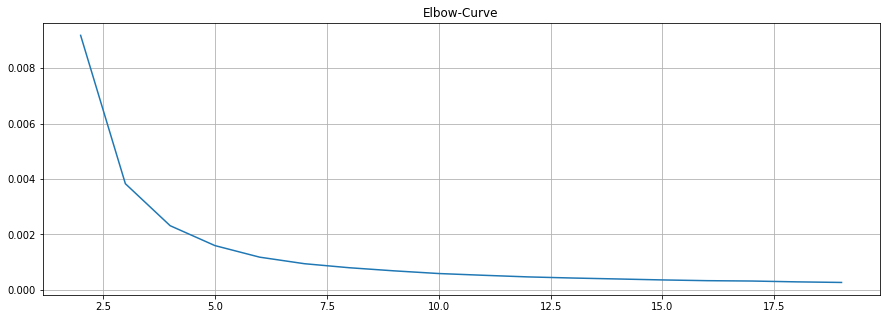

In [16]:
# We will try to find the optimal number of clusters and assign each stock to a specific cluster
# Calculate the average annual percentage return and volatilities over a theoritical one year period

from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

returns = data_cor.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data_cor.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

X = dta
distortions =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

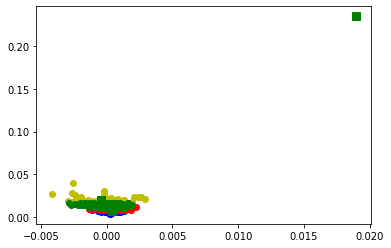

In [17]:
from pylab import plot, show
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [18]:
#identify the outlier
print(returns.idxmax())

Returns    NYSE.XRX
dtype: object


In [24]:
#drop the relevant stock from our data
data_cor.drop(['NYSE.XRX'],inplace=True,axis=1)

returns = data_cor.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data_cor.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
 
#recreate data to feed into the algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

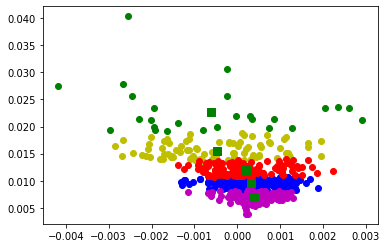

In [25]:
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [26]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]
#for detail in details:
#   print(list(detail))

[('NASDAQ.AAL', 1),
 ('NASDAQ.AAPL', 0),
 ('NASDAQ.ADBE', 0),
 ('NASDAQ.ADI', 2),
 ('NASDAQ.ADP', 2)]

In [27]:
df = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
df.Cluster_No.value_counts()

0    167
2    118
4    106
1     82
3     26
Name: Cluster_No, dtype: int64

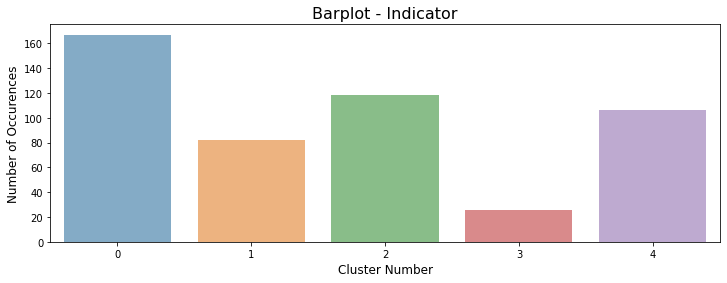

In [28]:
import seaborn as sns
ind = df.Cluster_No.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()



Excercise 3 PCA:

    Identify which all stocks are moving together and which all stocks are different from each other.



In [29]:
dt = data_cor.copy()

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X = dt.values

# Scaling the values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[46.97 64.24 76.27 81.13 84.93 87.74 89.74 91.05 92.1  92.85 93.53 94.11
 94.58 95.03 95.44 95.79 96.12 96.38 96.61 96.83 97.02 97.18 97.33 97.46
 97.59 97.71 97.82 97.92 98.01 98.09 98.17 98.25 98.32 98.39 98.45 98.51
 98.57 98.62 98.67 98.72 98.76 98.8  98.84 98.88 98.92 98.95 98.98 99.01
 99.04 99.07 99.1  99.13 99.16 99.18 99.2  99.22 99.24 99.26 99.28 99.3
 99.32 99.34 99.36 99.38 99.4  99.42 99.44 99.46 99.47 99.48 99.49 99.5
 99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61 99.62
 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73 99.74
 99.75 99.76 99.77 99.78 99.79 99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8 ]


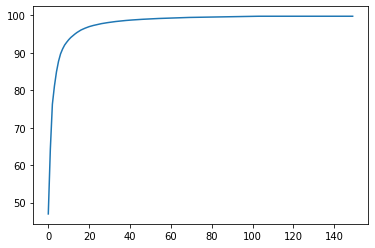

In [31]:
plt.plot(var1)

In [32]:
# Looking at above plot we can consider 25 variables 
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.54489969   9.98399845  -9.36306484 ...   0.55300342   0.10887619
    2.42277655]
 [ 25.64396757   9.87058075  -9.78352591 ...   0.45482953   0.19677852
    2.31493076]
 [ 25.55832141   9.80326405  -9.65680691 ...   0.53138429   0.06282327
    2.0597145 ]
 ...
 [-22.74268953  13.34385803   6.52612773 ...  -2.13788978   1.22353041
   -0.33330753]
 [-22.58678189  13.43459792   6.63993624 ...  -2.12362895   1.22914664
   -0.35990019]
 [-22.69505715  13.37926134   6.56805244 ...  -2.1610527    1.20999929
   -0.31955101]]


In [33]:
print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[0.03932727 0.04119779 0.06302875 ... 0.06260427 0.00257534 0.05182548]
 [0.06427995 0.03397585 0.00193476 ... 0.02032991 0.08130274 0.05943219]
 [0.03996486 0.06394349 0.01187376 ... 0.02086513 0.06626943 0.02349888]
 ...
 [0.01111273 0.0046764  0.00475799 ... 0.01180454 0.04419067 0.01141696]
 [0.0745216  0.01898661 0.01016412 ... 0.0015001  0.01850634 0.04844829]
 [0.02251364 0.03298092 0.03667463 ... 0.00427944 0.02094875 0.02455343]]


In [34]:
comp = pd.DataFrame(pca.components_, columns = dt.columns)
comp.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,...,NYSE.TXT,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039327,-0.041198,-0.063029,-0.009854,-0.035888,-0.054813,0.050489,-0.035384,-0.044205,-0.014613,-0.045847,-0.046733,-0.062357,-0.058175,0.061415,-0.036514,-0.023122,-0.063177,-0.042711,-0.037551,0.050646,-0.048221,-0.050282,-0.041439,-0.051707,0.045018,0.045010,-0.016019,-0.054341,-0.062472,0.050420,0.054243,0.055435,0.014776,0.034910,-0.058653,-0.046746,-0.057840,0.023651,-0.059664,...,-0.041569,0.024230,0.020629,0.017673,-0.050361,0.043185,-0.064014,-0.045358,0.032783,-0.057010,0.009347,-0.041329,-0.023715,-0.061391,-0.050321,-0.050299,-0.033704,0.010465,0.056742,-0.031026,0.007601,-0.048838,-0.051844,0.014504,-0.010099,-0.051272,-0.001738,-0.045522,-0.051433,0.032493,0.044324,-0.049520,0.057072,-0.054750,-0.050685,0.047282,-0.061482,-0.062604,0.002575,-0.051825
1,-0.064280,0.033976,0.001935,-0.032403,0.043516,-0.029425,0.016081,0.058270,-0.052583,0.012303,0.008241,-0.059773,-0.013984,-0.022509,0.002806,0.060076,-0.039748,0.018917,0.024834,-0.071498,0.039231,0.064188,0.056295,-0.022534,0.005273,-0.023915,0.017061,-0.091821,0.029616,-0.014303,-0.040015,-0.021266,-0.025184,-0.083092,0.042105,-0.016944,-0.020871,0.001045,0.018494,0.022216,...,0.020546,-0.082814,-0.080389,-0.097986,-0.044488,-0.040843,0.009042,0.043503,-0.064074,0.021722,0.049391,-0.009165,-0.088827,0.027208,-0.054595,0.060802,0.021983,-0.094977,-0.037007,-0.050954,0.086254,-0.060941,0.019199,-0.033759,-0.098311,0.043323,0.016401,0.010323,-0.045474,0.038669,-0.022112,-0.058897,0.030257,0.013746,-0.040753,-0.052867,0.031522,-0.020330,-0.081303,-0.059432
2,-0.039965,0.063943,0.011874,0.043297,-0.037457,0.040367,-0.053789,-0.051299,0.030592,-0.086503,-0.080661,-0.002924,0.025073,0.020384,0.019920,-0.056530,-0.057911,-0.000672,-0.081459,0.034811,-0.021178,0.011004,-0.019419,0.071178,-0.013165,0.063340,-0.009742,0.005606,-0.013975,0.017494,-0.004530,-0.050652,-0.046132,-0.036916,0.062670,0.039681,-0.026215,0.047026,-0.066135,-0.039603,...,-0.037822,-0.031166,-0.039151,0.014221,0.034871,-0.058502,-0.009101,-0.051266,0.023467,-0.024440,-0.077285,-0.041117,-0.003304,0.017404,0.003008,-0.017077,-0.086092,-0.008370,-0.015368,-0.001533,0.028662,0.027729,0.051253,-0.099291,-0.020911,-0.024583,-0.089080,0.053322,-0.042744,-0.027989,-0.046046,-0.003326,0.022205,0.059502,-0.034738,-0.028530,-0.004580,0.020865,-0.066269,0.023499
3,0.007225,0.077156,0.008401,-0.028080,-0.018027,0.008762,-0.032382,0.034501,0.051270,-0.078063,-0.023344,0.022817,0.009001,0.016953,-0.006326,-0.024200,-0.033206,-0.008800,-0.028220,0.016352,-0.035048,-0.007582,-0.011304,-0.016585,-0.076146,0.015580,0.069682,0.021457,-0.035426,0.018482,0.056994,-0.026802,-0.024301,-0.011060,0.083189,0.015447,-0.005456,0.027872,-0.124671,0.008175,...,0.044894,-0.018632,-0.005917,0.018259,-0.037010,0.029666,-0.006365,0.037859,0.020496,-0.035064,0.006780,0.042569,0.064063,0.013475,-0.034273,-0.014555,0.015646,0.019506,-0.036976,-0.115466,-0.051169,0.005986,-0.057203,0.029933,0.017191,-0.028419,0.105720,0.043400,0.002985,0.032738,-0.054202,0.021500,0.061063,-0.039785,0.027499,0.012080,0.002698,-0.002802,-0.049638,0.015167
4,-0.033182,-0.017369,0.002557,-0.038106,-0.101883,-0.034799,-0.010965,0.037455,-0.